<a href="https://colab.research.google.com/github/Saonoke/machine-learning-2024/blob/main/week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

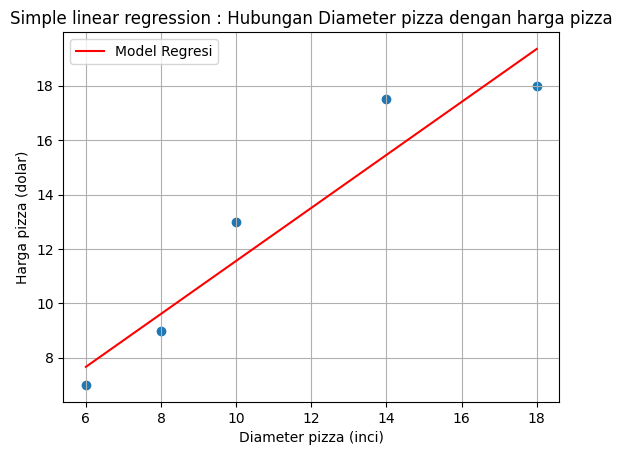

In [ ]:
# Dasar Teori
import numpy as np
import matplotlib.pyplot as plt

# data
diameter_pizza = np.array([6,8,10,14,18])
harga_pizza = np.array([7,9,13,17.5,18])

# Estimasi parameter
beta_0 = 1.82
beta_1 = 0.974

# Model regresi
harga_prediksi = beta_0 +  beta_1 * diameter_pizza

# membuat plot
plt.scatter(diameter_pizza, harga_pizza)
plt.plot(diameter_pizza, harga_prediksi, color='red', label='Model Regresi')
plt.xlabel('Diameter pizza (inci)')
plt.ylabel('Harga pizza (dolar)')
plt.title('Simple linear regression : Hubungan Diameter pizza dengan harga pizza')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Evaluasi model dengan cost function

def hitung_prediksi(diameter):
  return 1.82 + 0.974 * diameter

#data
harga_pizza_asli = harga_pizza
harga_pizza_prediksi = np.array([hitung_prediksi(6), hitung_prediksi(8), hitung_prediksi(10), hitung_prediksi(14), hitung_prediksi(18)])

# Menghitung RSS
RSS = np.sum((harga_pizza_asli - harga_pizza_prediksi )** 2)
print("RSS : ", RSS)



RSS :  8.89488


In [ ]:
# Evaluasi model dengan R-Squared (R2)
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Data
harga_pizza_asli = np.array([7,9,13,17.5,18])
diameter_pizza = np.array([6,8,10,14,18])

# Estimasi Parameter
beta_0 = 1.82
beta_1 = 0.974

# prediksi harga pizza
harga_pizza_prediksi = beta_0 + beta_1 * diameter_pizza

# Menghitung RSS (Residual Sum Of Squares)
RSS = np.sum((harga_pizza_asli - harga_pizza_prediksi)** 2)

# Menghitung TSS (Total Sum Of Squares)
TSS = np.sum((harga_pizza_asli - np.mean(harga_pizza_asli)) ** 2)

# Menghitung R-squared (R2)
R2 = 1 - (RSS / TSS)

print("Predicted Price in dollar: ", harga_pizza_prediksi)

# menghitung MAE (Mean Absolute Error)
mae = mean_absolute_error(harga_pizza_asli, harga_pizza_prediksi)

# Menghitung MSE (Mean Squared Error)
mse = mean_squared_error(harga_pizza_asli, harga_pizza_prediksi)

print("Residual sum of squares (RSS)",RSS)
print("Total sum of squares (TSS)", TSS)
print("R-squared (R2)", R2)
print("Mean absolute error (MAE)", mae)
print("Mean squared error (MSE)", mse)


Predicted Price in dollar:  [ 7.664  9.612 11.56  15.456 19.352]
Residual sum of squares (RSS) 8.89488
Total sum of squares (TSS) 97.19999999999999
R-squared (R2) 0.9084888888888889
Mean absolute error (MAE) 1.2224
Mean squared error (MSE) 1.7789760000000001


# Regresi Polinomial

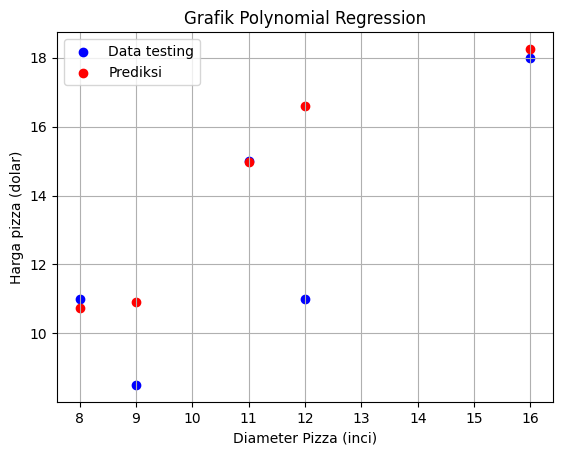

R-squared (R2): 0.34


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Data Training
x_train = np.array([
    [6,2],
    [8,1],
    [10,0],
    [14,2],
    [18,3]
])

y_train = np.array([7,9,13,17.5,18])

# data testing

x_test = np.array([
    [8,2],
    [9,0],
    [11,2],
    [16,2],
    [12,0]
])

y_test = np.array([11,8.5,15,18,11])

# Inisialisasi model linear regression
model = LinearRegression()

# Membentuk polinomial fitur
poly =  PolynomialFeatures(degree=2) # ganti degree sesuai dengan derajat polinomial yang diinginkan
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

# Melatih model dengan data training
model.fit(x_train_poly,y_train)

# melakukan prediksi dengan data testing
y_pred = model.predict(x_test_poly)

# Menghitung R-squared (R2) dari model terlatih
r2 = r2_score(y_test, y_pred)

# plot hasil regresi
plt.scatter(x_test[:,0], y_test, color='blue',label='Data testing')
plt.scatter(x_test[:,0], y_pred, color='red', label='Prediksi')
plt.title('Grafik Polynomial Regression')
plt.xlabel('Diameter Pizza (inci)')
plt.ylabel('Harga pizza (dolar)')
plt.legend()
plt.grid(True)
plt.show()

print(f"R-squared (R2): {r2:.2f}")


# Praktikum 1

In [4]:
import numpy as np
import pandas as pd

In [5]:
data = pd.read_csv('dataset.csv')


In [6]:
# Melihat beberapa data awal
data.head()

# melihat ukuran data
data.shape

# informasi tentang data
data.info()

# Deskripsi data
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [7]:
# library untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# visualisasi data dengan pairplot
sns.pairplot(data, x_vars = ['Time on app','Time on website','Length of membership'], y_vars = 'Yearly amount spent', size=4, aspect =1, kind='scatter')
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Avg. Session Length   500 non-null    float64
 1   Time on App           500 non-null    float64
 2   Time on Website       500 non-null    float64
 3   Length of Membership  500 non-null    float64
 4   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5)
memory usage: 19.7 KB


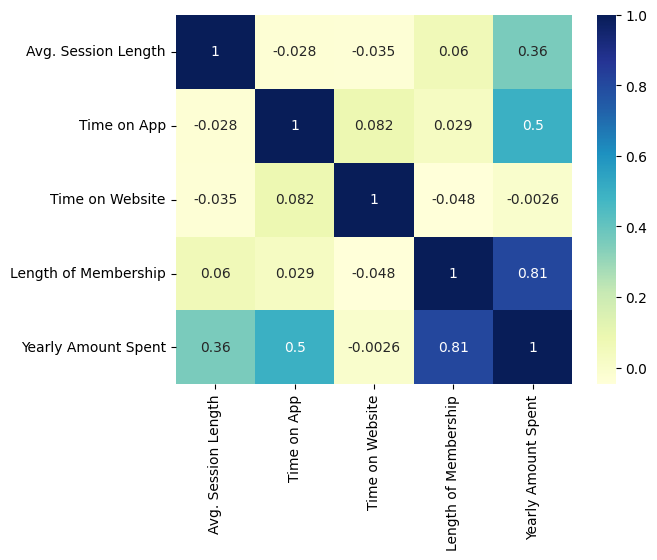

In [16]:
data = data.drop(columns=['Email','Address','Avatar'])
data.info()
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
plt.show()

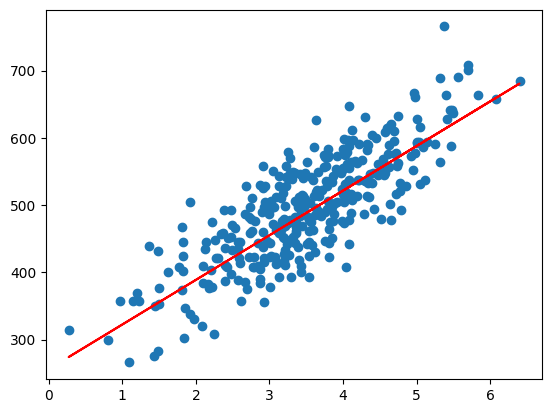

In [18]:
# Regresi Linier
x = data['Length of Membership']
y = data['Yearly Amount Spent']

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.7,test_size=0.3, random_state =100)

# Training model
import statsmodels.api as sm
x_train_sm = sm.add_constant(x_train)
lr = sm.OLS(y_train,x_train_sm).fit()

# Visualisasi garis regresi
plt.scatter(x_train,y_train)
plt.plot(x_train, 256.2483 + 66.3015 * x_train,'r' )
plt.show()


In [20]:
# Prediksi nilai y_value dari data x yang telah dilatih
y_train_pred = lr.predict(x_train_sm)

# Menghitung residual
res = (y_train - y_train_pred)



<ipython-input-22-e724fe52bd6a>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res,bins=15)


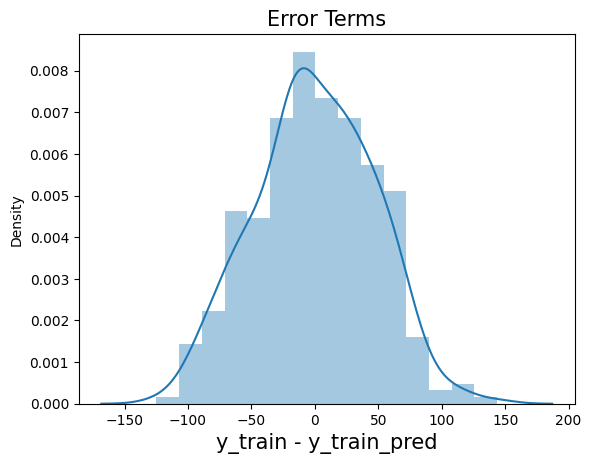

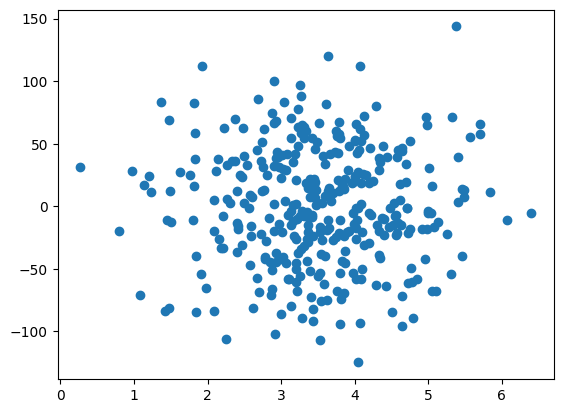

In [22]:
# Histogram residual
fig = plt.figure()
sns.distplot(res,bins=15)
plt.title('Error Terms', fontsize=15)
plt.xlabel('y_train - y_train_pred',fontsize=15)
plt.show()

# Scatter plot residual
plt.scatter(x_train,res)
plt.show()


In [23]:
# Prediksi pada data uji
x_test_sm = sm.add_constant(x_test)
y_test_pred = lr.predict(x_test_sm)

# Hitung nilai r-squared
from sklearn.metrics import r2_score
r2_score(y_test,y_test_pred)

0.611948913768747

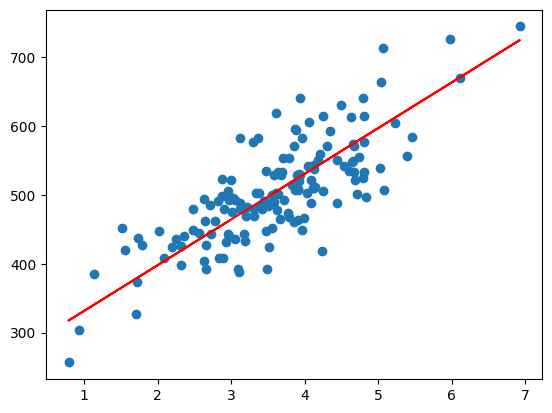

In [24]:
# Visualisasi data uji dan hasil prediksi
plt.scatter(x_test,y_test)
plt.plot(x_test,y_test_pred,'r')
plt.show()

In [25]:
# mengimpor library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dataset = pd.read_csv('Posisi_gaji.csv')
x = dataset.iloc[:,1:2].values
y = dataset.iloc[:,2].values

In [26]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
x = sc_x.fit_transform(x.reshape(-1,1))
y = sc_y.fit_transform(y.reshape(-1,1))

In [27]:
# Fitting SVR ke dataset
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(x,y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

<ipython-input-29-820fcfacb00b>:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x_grid = np.arange(min(x),max(x),0.01).reshape(-1,1)


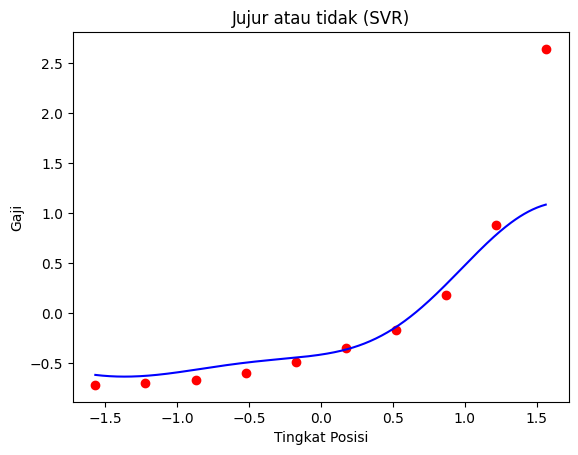

In [29]:
x_grid = np.arange(min(x),max(x),0.01).reshape(-1,1)
plt.scatter(x,y,color='red')
plt.plot(x_grid,regressor.predict(x_grid),color='blue')
plt.title('Jujur atau tidak (SVR)')
plt.xlabel('Tingkat Posisi')
plt.ylabel('Gaji')
plt.show()


In [30]:
# Prediksi hasil
# buat array 2D yang berisi tingkat posisi yang akan diprediksi
tingkat_posisi_prediksi = np.array([[6.5]])
#penskalaan fitur untuk data yang akan diprediksi
tingkat_posisi_prediksi = sc_x.transform(tingkat_posisi_prediksi)
# Melakukan prediksi menggunakan model SVR
gaji_prediksi = regressor.predict(tingkat_posisi_prediksi)
# Kembali hasil prediksi ke skala aslinya
gaji_prediksi = sc_y.inverse_transform(gaji_prediksi.reshape(-1,1))

In [31]:
print("Prediksi Gaji untuk tingkat posisi 6.5:",gaji_prediksi[0])


Prediksi Gaji untuk tingkat posisi 6.5: [170370.0204065]


In [32]:
# Evaluasi model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_actual = y
y_pred = regressor.predict(x)
# menghitung MAE
mae = mean_absolute_error(y_actual, y_pred)
# Menghitung MSE
mse = mean_squared_error(y_actual, y_pred)
# Menghitung RMSE
rmse = np.sqrt(mse)

# Menghitung R-squared
r2 = r2_score(y_actual, y_pred)

print("MAE :",mae)
print("MSE :",mse)
print("RMSE:",rmse)
print("R-squared :",r2)

MAE : 0.22299274095734414
MSE : 0.24839989293792014
RMSE: 0.4983973243687411
R-squared : 0.7516001070620798


# Tugas 1

##  1. Identifikasi variabel-variabel yang akan digunakan sebagai variabel bebas (fitur) dan variabel target (biaya medis personal).


In [46]:
# input data csv
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
data = pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [45]:
# PreProcessing
data = data[['age','sex','children','charges']]
data.head()

,age,sex,children,charges
0,19,0,0,16884.92400
1,18,1,1,1725.55230
2,28,1,3,4449.46200
3,33,1,0,21984.47061
4,32,1,0,3866.85520


In [56]:


le = LabelEncoder()
data['sex'] = le.fit_transform(data['sex'])
data['region'] = le.fit_transform(data['region'])
data['smoker'] = le.fit_transform(data['smoker'])
data.head()


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [57]:
# bagi dataset

x = data[['age','sex','children','bmi','region','smoker']]
y = data['charges']
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.7,test_size=0.3, random_state =100)

model = LinearRegression()

model.fit(x_train,y_train)

y_pred = model.predict(x_test)

r21 = r2_score(y_test,y_pred)

print(f"R-squared (R2): {r21:.2f}")


R-squared (R2): 0.78
